In [54]:
# Change style according to FH
#import matplotlib.pyplot as plt

from plot.plots import * 




# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke


# CRISP-DM

<img style="float: right;" src="img/CRISP-DM_Process.png" width=30% class="stretch">

* CRISP-DM: Cross Industry Standard Process for Data Mining 
* Iteratives Vorgehensmodell zur Erstellung von Use Cases basierend auf Maschine Learning. 
* Dieses Vorgehensmodell ist die Grundlage für das Modul.

*Quelle: Kenneth Jenson, based on original IBM CRISP-DM*

# Grundformel des Maschinellen Lernens

$$Y = f(X) + \epsilon$$

* $X$ entspricht den Prediktoren (Unabhängigen Variablen, Features, Input).
* $Y$ entspricht der Antwort (Abhängige Variable, Output).
* $\epsilon$ entspricht dem zufälligen Fehlerterm mit Mittelwert $\mu = 0$.
* $f()$ ist die "unbekannte" Funktion zwischen Prediktor und Antwort.
* Später werden wir versuchen ein $\hat{f}()$ zu bestimmen, welches $f()$ so gut wie möglich approximiert. 


# Heute

* Viele Aspekte des Maschinellen Lernens basieren auf Wahrscheinlichkeiten. 
* Da diese Inhalte nicht immer in Ihren Grundlagen vorkommen, wird das Thema heute in kurzer Form behandelt. 
* Ebenso werden einige Aspekte der (univariaten) Statistik aufgegriffen. 

# Drei Elemente der Wahrscheinlichkeit

<center><img src="img/wuerfel.png" width=40% class="stretch"></center>


* $\Omega$ entspricht der Ereignismenge.
* $A$ ist ein Ereignis.
* $P$ ist die Wahrscheinlichkeit (für ein Ereignis).

*vgl. Konkrete Mathematik nicht nur für Informatiker, Weitz* 

# Mengenoperationen

<center><img src="img/tafel_mengen.png" width=60% class="stretch"></center>

* $A$ und $B$ können beide eintreten ($A \cap B$)
* Es kann $A$ oder $B$ eintreten ($A \cup	B$)
* $A$ kann das "Gegenteil" von B sein ($A \setminus B$)
    * Hier erlauben wir uns zwischendurch eine Abkürzung $A^C = \Omega \setminus A$
* $A$ kann eine Teilmenge von $B$ sein ($A\subseteq B$)


# Wahrscheinlichkeit $P$

* Eine Wahrscheinlichkeit für ein Ereignis hat einen Wert zwischen $0$ und $1$.

$$0\le P(A)\le1 $$



* D.h. von allen möglichen Ergebnissen wird eines sicher eintreten.

$$P(\Omega) = 1$$



* D.h. wenn $A$ und $B$ sich gegenseitig ausschließen, entspricht die Gesamtwahrscheinlichkeit für das Eintreten eines der beiden Ereignisse der Summe der Wahrscheinlichkeiten.  

$$P(A \cup B) = P(A) + P(B)$$


* D.h. die Wahrscheinlichkeit für das gegenteilige Ereignis entspricht Eins minus der ursprünglichen Wahrscheinlichkeit.

$$P(A^C) = 1-P(A)$$



* Für jeweils disjunkte Ereignisse $A_k$ dürfen wir aufsummieren.

$$P(\bigcup^\infty_{k=1} A_k) = \sum^\infty_{k=1} P(A_k)$$


# Laplace Experiment

$$1 = P(\Omega) = P({1})+ \dots + P({6})$$

* Für den Würfel gilt: Die Summe der Ereignis-Wahrscheinlichkeiten ist Eins. Alle Ereignisse sind gleich wahrscheinlich. 

$$P(A) = \frac{|A|}{|\Omega|}$$
 
* Anders ausgedrückt: Die Wahrscheinlichkeit für ein Ereignis hängt lediglich davon ab, wie groß die abzählbare Menge $\Omega$ ist. Wir reden von einem Laplace Experiment.

* Wäre der Würfel gefälscht, z.B. es gäbe eine höhere Wahrscheinlichkeit eine sechs zu würfeln, dann handelt es sich nicht mehr um ein gültiges Laplace Experiment.

# Experiment Drei Würfel

* Ziel ist es in die bedingten Wahrscheinlichkeiten einzusteigen. Zunächst aber ein einfaches Experiment: 
    * Es werden verdeckt drei Würfel geworfen. 
    * Sie müssen sich ohne Kenntnis des Ergebnisses für eine der beiden folgenden Aussagen entscheiden und bekommen einen Preis, wenn die gewählte Aussage richtig ist: 
        * $A_1:$ Die gesamte Augenzahl ist maximal neun. 
        * $A_2:$ Mindestens zwei Würfel zeigen dieselbe Augenzahl an. 
        
### Frage: Welches Ereignis ist wahrscheinlicher?

# Ereignismenge $\Omega$ für 3 Würfel

$$X = \{1, 2, 3, 4, 5, 6\}$$
* Ein Würfel hat die Ereignismenge $X$

$$\Omega = X^3$$

* $\Omega$ setzt sich zusammen aus den Ereignismengen $X$ für die einzelnen Würfel.


In [55]:
from itertools import product
X = range(1,7)
Omega = [p for p in product(X, X, X)]
Omega, len(Omega)

([(1, 1, 1),
  (1, 1, 2),
  (1, 1, 3),
  (1, 1, 4),
  (1, 1, 5),
  (1, 1, 6),
  (1, 2, 1),
  (1, 2, 2),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 2, 6),
  (1, 3, 1),
  (1, 3, 2),
  (1, 3, 3),
  (1, 3, 4),
  (1, 3, 5),
  (1, 3, 6),
  (1, 4, 1),
  (1, 4, 2),
  (1, 4, 3),
  (1, 4, 4),
  (1, 4, 5),
  (1, 4, 6),
  (1, 5, 1),
  (1, 5, 2),
  (1, 5, 3),
  (1, 5, 4),
  (1, 5, 5),
  (1, 5, 6),
  (1, 6, 1),
  (1, 6, 2),
  (1, 6, 3),
  (1, 6, 4),
  (1, 6, 5),
  (1, 6, 6),
  (2, 1, 1),
  (2, 1, 2),
  (2, 1, 3),
  (2, 1, 4),
  (2, 1, 5),
  (2, 1, 6),
  (2, 2, 1),
  (2, 2, 2),
  (2, 2, 3),
  (2, 2, 4),
  (2, 2, 5),
  (2, 2, 6),
  (2, 3, 1),
  (2, 3, 2),
  (2, 3, 3),
  (2, 3, 4),
  (2, 3, 5),
  (2, 3, 6),
  (2, 4, 1),
  (2, 4, 2),
  (2, 4, 3),
  (2, 4, 4),
  (2, 4, 5),
  (2, 4, 6),
  (2, 5, 1),
  (2, 5, 2),
  (2, 5, 3),
  (2, 5, 4),
  (2, 5, 5),
  (2, 5, 6),
  (2, 6, 1),
  (2, 6, 2),
  (2, 6, 3),
  (2, 6, 4),
  (2, 6, 5),
  (2, 6, 6),
  (3, 1, 1),
  (3, 1, 2),
  (3, 1, 3),
  (3, 1, 4),
  (3, 1, 5),

# Ergebnismengen

* $A_1$: Augenzahl ist maximal Neun: Von allen Elementen $\Omega$ bestimmen wir die Summe und filtern. 
* $A_2$: Mindestens zwei Würfel mit dem gleichen Ergebnis: Von allen Elementen $\Omega$ bestimmen wir die Menge ohne Doppelungen und filtern. 

In [56]:
A1  = list(filter(lambda x: sum(x)<=9, Omega))
A1, len(A1)

([(1, 1, 1),
  (1, 1, 2),
  (1, 1, 3),
  (1, 1, 4),
  (1, 1, 5),
  (1, 1, 6),
  (1, 2, 1),
  (1, 2, 2),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 2, 6),
  (1, 3, 1),
  (1, 3, 2),
  (1, 3, 3),
  (1, 3, 4),
  (1, 3, 5),
  (1, 4, 1),
  (1, 4, 2),
  (1, 4, 3),
  (1, 4, 4),
  (1, 5, 1),
  (1, 5, 2),
  (1, 5, 3),
  (1, 6, 1),
  (1, 6, 2),
  (2, 1, 1),
  (2, 1, 2),
  (2, 1, 3),
  (2, 1, 4),
  (2, 1, 5),
  (2, 1, 6),
  (2, 2, 1),
  (2, 2, 2),
  (2, 2, 3),
  (2, 2, 4),
  (2, 2, 5),
  (2, 3, 1),
  (2, 3, 2),
  (2, 3, 3),
  (2, 3, 4),
  (2, 4, 1),
  (2, 4, 2),
  (2, 4, 3),
  (2, 5, 1),
  (2, 5, 2),
  (2, 6, 1),
  (3, 1, 1),
  (3, 1, 2),
  (3, 1, 3),
  (3, 1, 4),
  (3, 1, 5),
  (3, 2, 1),
  (3, 2, 2),
  (3, 2, 3),
  (3, 2, 4),
  (3, 3, 1),
  (3, 3, 2),
  (3, 3, 3),
  (3, 4, 1),
  (3, 4, 2),
  (3, 5, 1),
  (4, 1, 1),
  (4, 1, 2),
  (4, 1, 3),
  (4, 1, 4),
  (4, 2, 1),
  (4, 2, 2),
  (4, 2, 3),
  (4, 3, 1),
  (4, 3, 2),
  (4, 4, 1),
  (5, 1, 1),
  (5, 1, 2),
  (5, 1, 3),
  (5, 2, 1),
  (5, 2, 2),

In [57]:
A2  = list(filter(lambda x: len(set(x)) <3, Omega))
A2, len(A2)

([(1, 1, 1),
  (1, 1, 2),
  (1, 1, 3),
  (1, 1, 4),
  (1, 1, 5),
  (1, 1, 6),
  (1, 2, 1),
  (1, 2, 2),
  (1, 3, 1),
  (1, 3, 3),
  (1, 4, 1),
  (1, 4, 4),
  (1, 5, 1),
  (1, 5, 5),
  (1, 6, 1),
  (1, 6, 6),
  (2, 1, 1),
  (2, 1, 2),
  (2, 2, 1),
  (2, 2, 2),
  (2, 2, 3),
  (2, 2, 4),
  (2, 2, 5),
  (2, 2, 6),
  (2, 3, 2),
  (2, 3, 3),
  (2, 4, 2),
  (2, 4, 4),
  (2, 5, 2),
  (2, 5, 5),
  (2, 6, 2),
  (2, 6, 6),
  (3, 1, 1),
  (3, 1, 3),
  (3, 2, 2),
  (3, 2, 3),
  (3, 3, 1),
  (3, 3, 2),
  (3, 3, 3),
  (3, 3, 4),
  (3, 3, 5),
  (3, 3, 6),
  (3, 4, 3),
  (3, 4, 4),
  (3, 5, 3),
  (3, 5, 5),
  (3, 6, 3),
  (3, 6, 6),
  (4, 1, 1),
  (4, 1, 4),
  (4, 2, 2),
  (4, 2, 4),
  (4, 3, 3),
  (4, 3, 4),
  (4, 4, 1),
  (4, 4, 2),
  (4, 4, 3),
  (4, 4, 4),
  (4, 4, 5),
  (4, 4, 6),
  (4, 5, 4),
  (4, 5, 5),
  (4, 6, 4),
  (4, 6, 6),
  (5, 1, 1),
  (5, 1, 5),
  (5, 2, 2),
  (5, 2, 5),
  (5, 3, 3),
  (5, 3, 5),
  (5, 4, 4),
  (5, 4, 5),
  (5, 5, 1),
  (5, 5, 2),
  (5, 5, 3),
  (5, 5, 4),
  (5, 5, 5),

# Berechnung der Wahrscheinlichkeit $P(A_1)$ und $P(A_2)$

* Wir befinden uns weiterhin in einem Laplace-Experiment, daher gilt:

$$P(A) = \frac{|A|}{|\Omega|}$$



In [58]:
P_A1 = len(A1)/len(Omega)
P_A2 = len(A2)/len(Omega)

P_A1, P_A2 # Mit A2 haben Sie eine höhere Wahrscheinlichkeit

(0.375, 0.4444444444444444)

# Bedingte Wahrscheinlichkeit

* Bisher haben Sie ein einfaches Laplace Experiment ohne Bedingungen gerechnet. Es soll nun die gleiche Fragestellung beantwortet werden, jedoch ist bekannt, dass **einer der Würfel eine $1$ zeigt**!

* Zunächst wird eine neue Ereignismenge $\Omega'$ erstellt, bei der mindestens ein Würfel eine $1$ zeigt.

In [59]:
Omega_strich =  list(filter(lambda L: 1 in L, Omega))
Omega_strich, len(Omega_strich)

([(1, 1, 1),
  (1, 1, 2),
  (1, 1, 3),
  (1, 1, 4),
  (1, 1, 5),
  (1, 1, 6),
  (1, 2, 1),
  (1, 2, 2),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 2, 6),
  (1, 3, 1),
  (1, 3, 2),
  (1, 3, 3),
  (1, 3, 4),
  (1, 3, 5),
  (1, 3, 6),
  (1, 4, 1),
  (1, 4, 2),
  (1, 4, 3),
  (1, 4, 4),
  (1, 4, 5),
  (1, 4, 6),
  (1, 5, 1),
  (1, 5, 2),
  (1, 5, 3),
  (1, 5, 4),
  (1, 5, 5),
  (1, 5, 6),
  (1, 6, 1),
  (1, 6, 2),
  (1, 6, 3),
  (1, 6, 4),
  (1, 6, 5),
  (1, 6, 6),
  (2, 1, 1),
  (2, 1, 2),
  (2, 1, 3),
  (2, 1, 4),
  (2, 1, 5),
  (2, 1, 6),
  (2, 2, 1),
  (2, 3, 1),
  (2, 4, 1),
  (2, 5, 1),
  (2, 6, 1),
  (3, 1, 1),
  (3, 1, 2),
  (3, 1, 3),
  (3, 1, 4),
  (3, 1, 5),
  (3, 1, 6),
  (3, 2, 1),
  (3, 3, 1),
  (3, 4, 1),
  (3, 5, 1),
  (3, 6, 1),
  (4, 1, 1),
  (4, 1, 2),
  (4, 1, 3),
  (4, 1, 4),
  (4, 1, 5),
  (4, 1, 6),
  (4, 2, 1),
  (4, 3, 1),
  (4, 4, 1),
  (4, 5, 1),
  (4, 6, 1),
  (5, 1, 1),
  (5, 1, 2),
  (5, 1, 3),
  (5, 1, 4),
  (5, 1, 5),
  (5, 1, 6),
  (5, 2, 1),
  (5, 3, 1),

In [60]:
A1_strich  = list(filter(lambda x: sum(x)<=9, Omega_strich))
A2_strich  = list(filter(lambda x: len(set(x)) <3, Omega_strich))
P_A1_strich = len(A1_strich)/len(Omega_strich)
P_A2_strich = len(A2_strich)/len(Omega_strich)

P_A1_strich, P_A2_strich # Mit A1_strich haben Sie eine höhere Wahrscheinlichkeit

(0.6703296703296703, 0.34065934065934067)

# Bedingte Wahrscheinlichkeit

<img style="float: right;" src="img/tafel_schnitt.png" width=15% class="stretch">

* Wir haben die Lösung über einen neuen Wahrscheinlichkeitsraum ($\Omega', P', A'$) berechnet. 
* Da $\Omega'$ aber ein Teil der Menge $\Omega$ ist, wäre auch die folgende Schlussfolgerung möglich: 
    * $\Omega'$ und $A_i$ sind Teilmengen von $\Omega$ daher gilt: $A' = A\cap\Omega'$
    * Wir ersetzen $\Omega'$ durch $B$

$$P'(A'_i) = \frac{|A'_i|}{|\Omega'|} = \frac{|A_i|\cap|B|}{|B|} = \frac{|A_i|\cap|B|}{|\Omega|}\frac{|\Omega|}{|B|} = \frac{P(A_i\cap B)}{P(B)}$$

* Die Wahrscheinlichkeit für $A'$ entspricht der Wahrscheinlichkeit, dass $A$ eintritt, wenn wir wissen, dass $B$ eintreten wird.
* Kurz geschrieben: 
$$\frac{P(A\cap B)}{P(B)} = P(A|B)$$

# Bayes Rule

* Zwei bedingte Wahrscheinlichkeiten für $P(A|B)$ und $P(B|A)$

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$
$$P(B|A) = \frac{P(B\cap A)}{P(A)}$$


* Den Schnitt können wir in jedwede Richtung notieren

$$P(A\cap B) = P(B\cap A)$$


* Somit erhalten wir die Formel von Bayes, die eine Zusammenhang zwischen $P(A|B)$ und $P(B|A)$ herstellt.

$$P(A|B) = \frac{P(A\cap B)}{P(B)} \frac{P(A)}{P(A)} = \frac{P(A)}{P(B)}P(B|A)$$


# Beispiel: Beulenkrankheit

* Sie erwachen mit Beulen im Gesicht.
* Beunruhigt wenden Sie sich an einen Arzt und erhalten folgende Information:

**Dr.**:  90% der Patienten, die an Pocken erkrankt sind, haben Beulen im Gesicht.


**Sie:** Wie hoch ist die Wahrscheinlichkeit, dass ich an Pocken erkrankt bin, wenn ich Beulen im Gesicht habe?

**Dr.:** Die Wahrscheinlichkeit ist 1,1%

# Aus der Sicht der Behandler*In

* 90% der an Pocken erkrankten Patienten haben Beulen im Gesicht.
* 80% der an Windpocken erkrankten Patienten haben Beulen im Gesicht.
* Die Wahrscheinlichkeiten sind vergleichbar.

* Es ist bekannt, dass Windpocken sehr viel häufiger auftreten als Pocken.
* Dieses Wissen ist a-priori vorhanden, d.h. bevor das Symptom beobachtet wurde.
* Mit dem Satz von Bayes wird dieses Wissen nutzbar.

# Bedingte Wahrscheinlichkeit

$$P(A|B) = \frac{P(A\cap B)}{P(B)} \frac{P(A)}{P(A)} = \frac{P(A)}{P(B)}P(B|A)$$
* Wenn B eingetreten ist, wie hoch ist die Wahrscheinlichkeit für A?

$$P(\text{Beulen}|\text{Pocken}) = 0.9$$

$$P(\text{Beulen}|\text{Windpocken}) = 0.8$$


* Die eigentlich relevante Frage ist aber die nach der umgekehrten Wahrscheinlichkeit:
    
$$P(\text{Pocken}|\text{Beulen}) = ?$$


# Bayes Rule

* Unser Prior Wissen besagt:

$$P(\text{Pocken}) = 0.001$$

* Die Wahrscheinlichkeit für unsere Beobachtung ist:

$$P(\text{Beulen}) = 0.081$$


* Die Wahrscheinlichkeit, dass irgendein Patient an Pocken erkrankt ist, beträgt ~0.01.

$$P(\text{Pocken}|\text{Beulen}) = \frac{P(\text{Beulen}|\text{Pocken})P(\text{Pocken})}{P(\text{Beulen})} = \frac{0.9 \cdot 0.001}{0.081}= 0.011$$


# Bayes Rule II

$$\text{posterior} = \frac{\text{likelihood}*\text{prior}}{\text{evidenz}}$$

* Wir wollen den *Posterior* bestimmen.
* Der *Prior* beschreibt die Wahrscheinlichkeit für eine Auftreten ohne konkrete Beobachtungen.
* Die *Likelihood* ist die inverse Wahrscheinlichkeit des posteriors.
* Die *Evidenz* beschreibt die Wahrscheinlichkeit für die Beobachtung. Sie ist unabhängig von der Klasse!

$$P(\text{Hypothese}|\text{Daten}) = \frac{P(\text{Daten}|\text{Hypothese})P(\text{Hypothese})}{P(\text{Daten})} $$ 


# Einführung in die Statisik

<img style="float: right;" src="img/stigler.png" width=30% class="stretch">

- *If you've never missed a flight, you're probably spending too much time in airports.* Georg Stigler (1911-1991) 


- Bestimmen Sie die mittlere Verweildauer am Flughafen
    - Flughäfen verdienen an der Vermietung von Ladenlokalen.
    - Desto länger ein Passagier am Flughafen verweilt, desto eher kauft er in einem Laden.
    - Als Verkaufsargument möchte der Flughafen die durchschnittliche Verweildauer am Flughafen berechnen.

- Es wird von den 17,23mio Passagieren per anno am Flughafen Hamburg ausgegangen

*Quelle: http://www.nap.edu*

In [61]:
# Erstelle einen Datensatz mit 17,23 mio Passagieren, mu = 120, sigma = 50
df = pd.DataFrame(np.random.normal(120,50,size=(17230000, 1)), columns=['Zeit am Flughafen'])
df 

,Zeit am Flughafen
0,139.865458
1,109.231721
2,157.374689
3,175.025525
4,99.870265
...,...
17229995,77.105238
17229996,161.078653
17229997,132.644675
17229998,54.658850


# Beschreibung einer Messgröße (daten-basiert)

* Arithmetisches Mittel (oft einfach der Mittelwert)

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n{x_i}$$

* (Stichproben) Standardabweichung

$$s_n = \sqrt{\frac{1}{n-1} \sum_{i=1}^n \left(x_i - \bar{x}\right)^2}$$

* Die Daten sind *verteilt*. Zunächst lohnt sich der Blick auf ein Histogramm


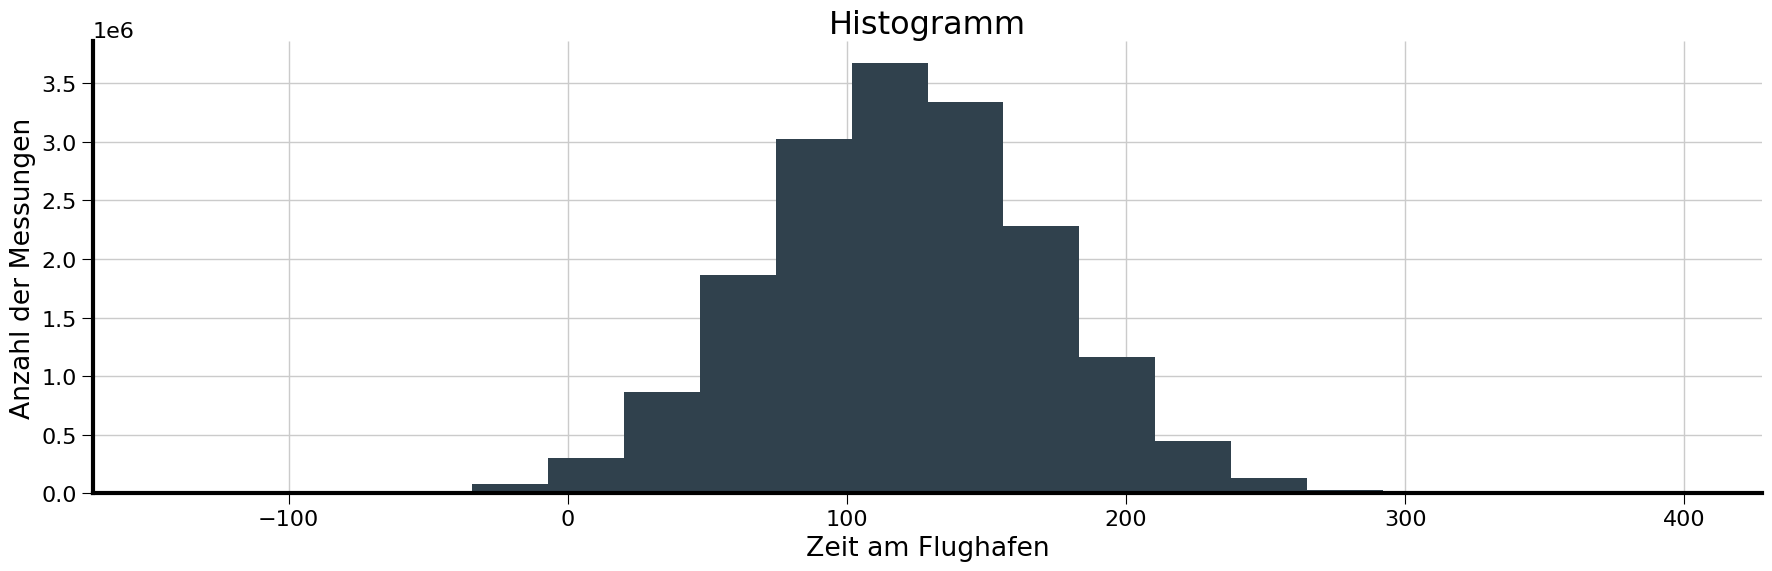

In [62]:
plot_histogramm(df['Zeit am Flughafen'], 
                size = half_plot_size, 
                n_bin = 20, 
                titledic = {'title': 'Histogramm',
                            'ylabel': 'Anzahl der Messungen', 
                            'xlabel': 'Zeit am Flughafen'})

## Zufallsvariable

* Im vorherigen Kapitel haben wir eine Ereignismenge $A$ kennengelernt.
* Wir nennen $X$ eine Zufallsvariable, wenn es die Variable ist, die verschiedene Ereignisse aus $A$ annimmt. 
* In unserem Beispiel ist $X$ die gemessene Zeit am Flughafen.
* $X$ ist in diesem Fall nahezu kontinuierlich (nur durch unsere Messgenauigkeit begrenzt) und in einem Intervall definiert (durch die Dauer unseres Experiments).

## Daten/Sample/Messwerte vs. Vollständige Information

* Selten kennen wir alle Informationen.
* Uns bleibt nur die Möglichkeit zu *messen*.
* Eine Messung ist in der Regel fehlerbehaftet.

# Gauss-Verteilung

<center><img src="img/gauss_paper.png" width=40% class="stretch"></center>

* Die Fläche unter der Kurve ist gleich 1.
* Die Funktion reicht von plus bis minus unendlich.
* Zentraler Grenzwertsatz: Wiederholte unabhängige zufällige Entscheidungen führen zur Gauss-Verteilung

# Beispiel: Wetter in Kiel

* Dargestellt sind die Windgeschwindigkeiten und Durchschnittstemperaturen in Kiel für das Jahr 2022?
* **Welche Datenreihe hat den höheren Durchschnittswert? Welche die höhere Varianz?**

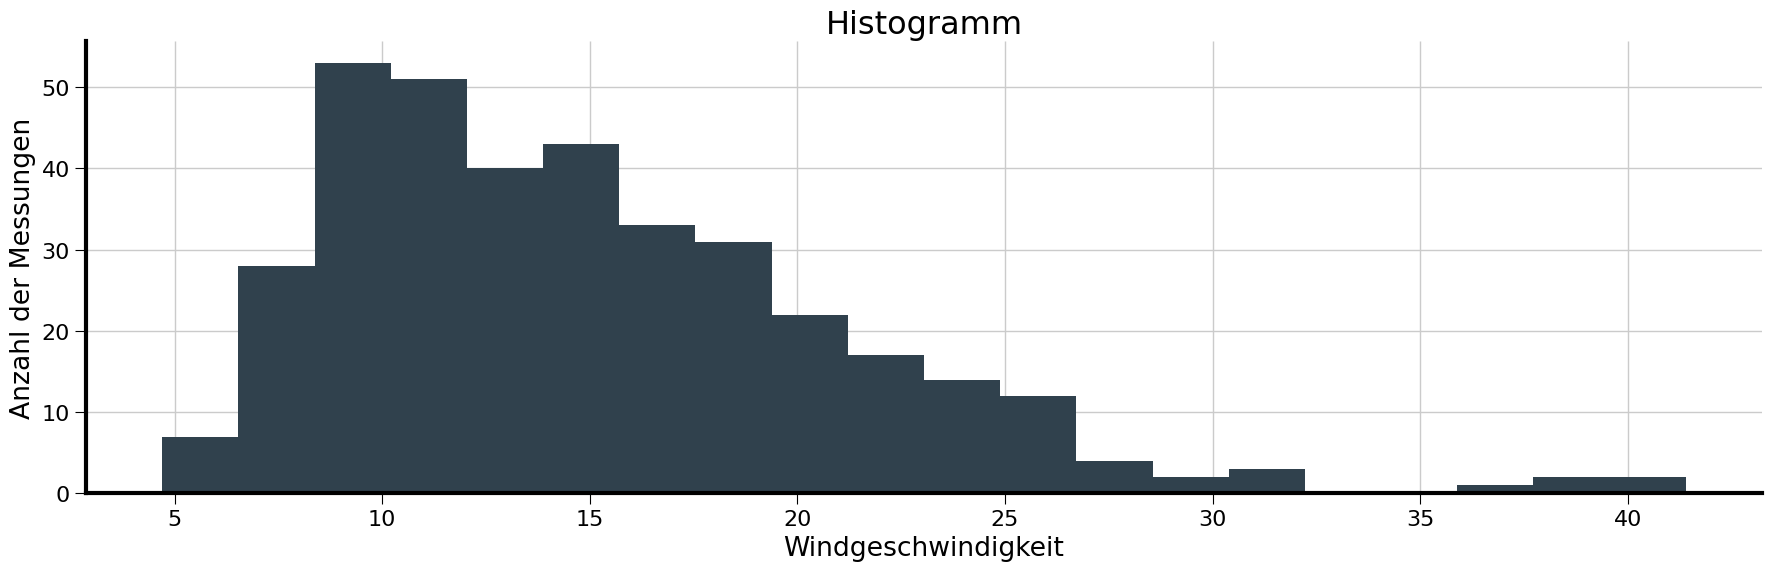

In [63]:
wf = pd.read_csv('data/wetter.csv')
plot_histogramm(wf['wspd'], 
                size = half_plot_size, 
                n_bin = 20, 
                titledic = {'title': 'Histogramm',
                            'ylabel': 'Anzahl der Messungen', 
                            'xlabel': 'Windgeschwindigkeit'})

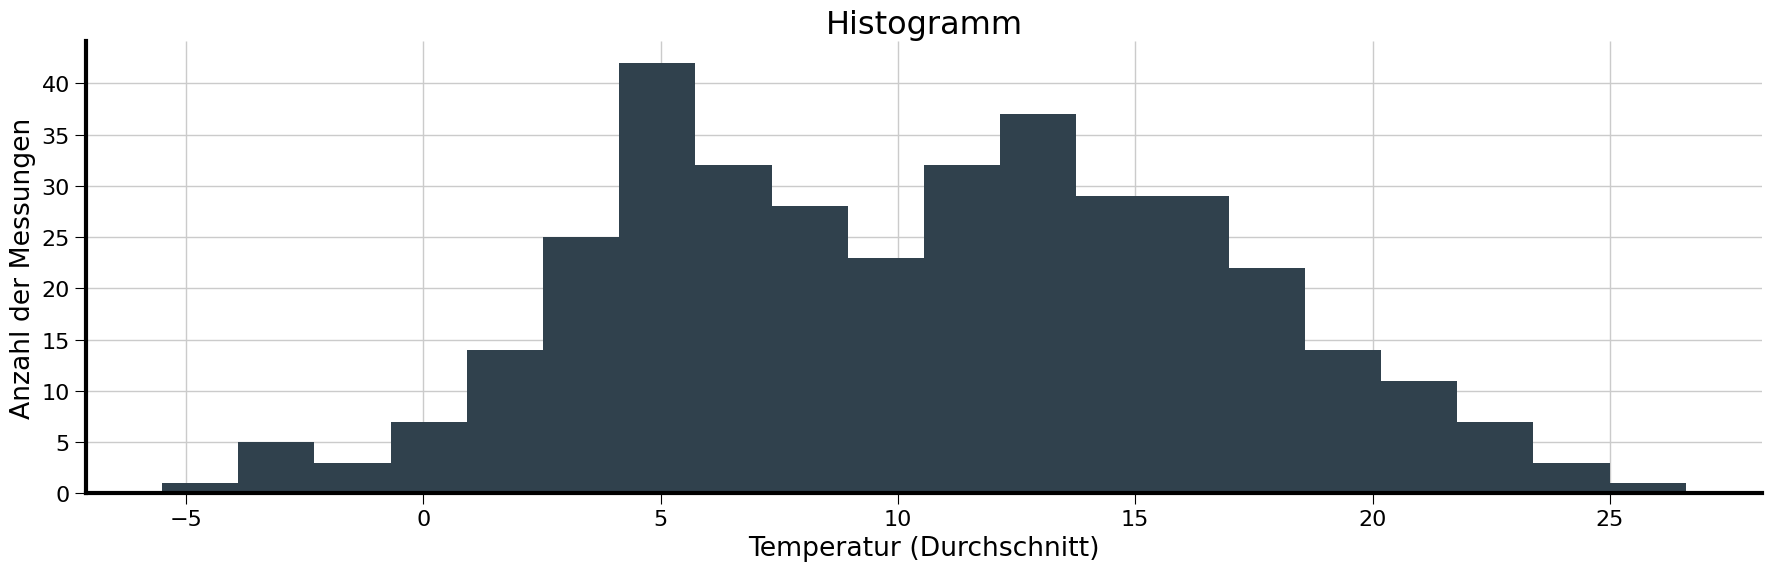

In [64]:
plot_histogramm(wf['tavg'], 
                size = half_plot_size, 
                n_bin = 20, 
                titledic = {'title': 'Histogramm',
                            'ylabel': 'Anzahl der Messungen', 
                            'xlabel': 'Temperatur (Durchschnitt)'})

In [65]:
wf.wspd.mean(), wf.tavg.mean() 

(15.1827397260274, 10.510136986301369)

In [66]:
wf.wspd.std(), wf.tavg.std() 

(6.227862169200188, 6.096155447896606)

* Quelle: https://meteostat.net/de*

# Mittel- und Erwartungswerte

* $\mu$ ist der **Erwartungwert** unserer Zufallsvariable $X$. In der Regel unbekannt. 
* Wir messen die Größe $X$ $n$-mal und erhalten $x_1, \cdots, x_n$ Messwerte.
* Der **Mittelwert** $\bar{x}$ berechnet sich, wie bereits gezeigt, zu: 

**<center> $$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$$ </center>**




In [67]:
# Erwartungswert berechnet auf allen Daten
# ! Diese Daten kennen wir in der Regel nicht
df['Zeit am Flughafen'].mean()

120.02752078231468

In [68]:
# Mittelwert berechnet anhand von 100 Messwerten
df.sample(100).mean()

Zeit am Flughafen    115.075475
dtype: float64

In [69]:
# Berechnung von RSS, RSE und SE

x = []
y = []
rse = []
rss_i = []
se = []
xi = []
for n in range(50,1050,50): # Starte mit 50 Stichproben, Ende mit 1000
    x.append(n*[n]) 
    sample = df.sample(n)
    xi.append(sample.values.tolist())
    y.append(sample.mean())
    rss = ((sample['Zeit am Flughafen'].values-sample.mean()[0])**2).sum()
    rss_i.append(rss)
    rse.append(np.sqrt(rss/(n-1)))
    se.append(np.sqrt(rss/(n-1))**2/n)

x = [item for sublist in x for item in sublist]
xi = [item for sublist in xi for item in sublist]

/var/folders/3j/b6syzxns7712b70_rnpwyd50f5cv7v/T/ipykernel_9628/1673007620.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Bestimmen des Mittelwerts

* Die *vollständige* Information umfasst 17,23mio Werte
* Wir ziehen davon eine Stichprobe der Größe $n$
* Wir bestimmen den Mittelwert $\bar{x}$. 
* $\bar{x}$ entspricht unsere Schätzung von $\mu$ daher $\bar{x}=\hat{\mu}$ 

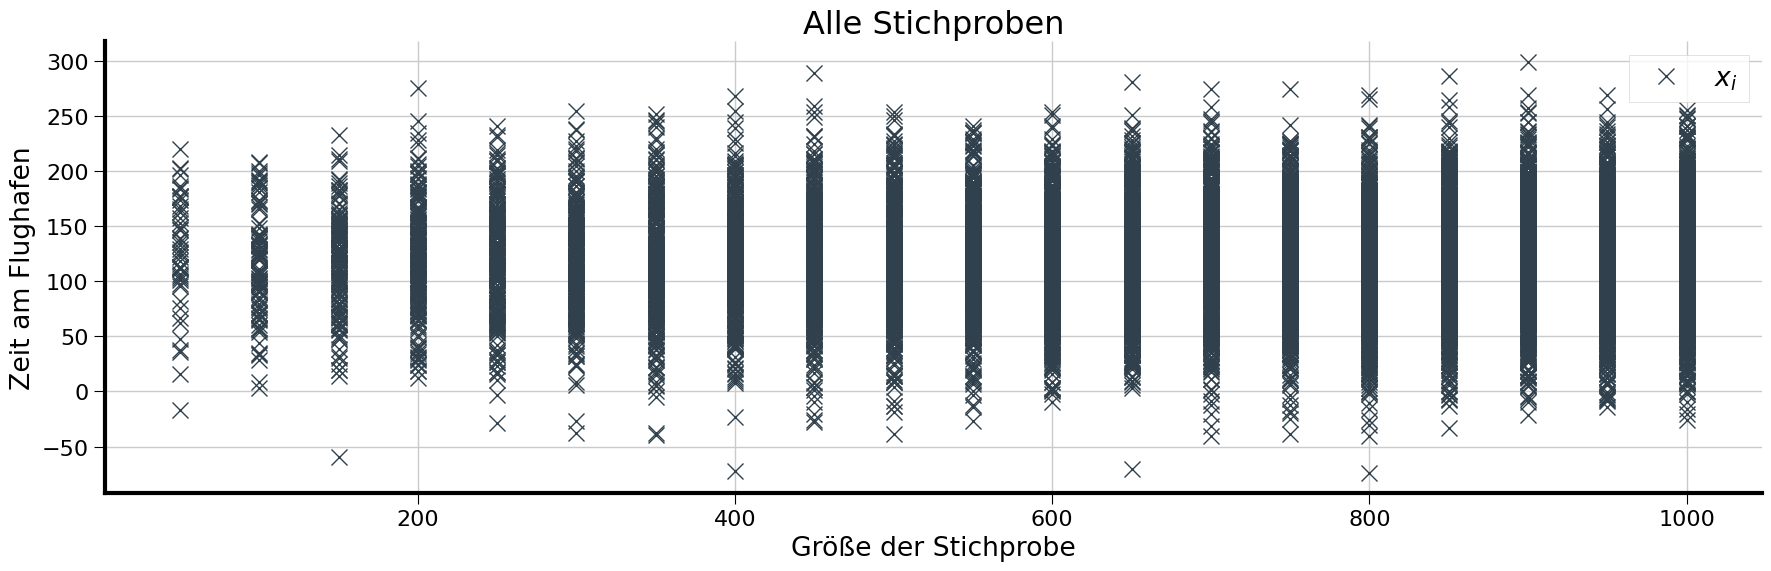

In [70]:
data = [{'x': x, 'y': xi, 'label': '$x_i$', 'format': 'x'}]
title = {'title':'Alle Stichproben', 'ylabel': 'Zeit am Flughafen', 'xlabel':'Größe der Stichprobe'}
plot_lines(data, half_plot_size, title)

# Bestimmen des Mittelwerts

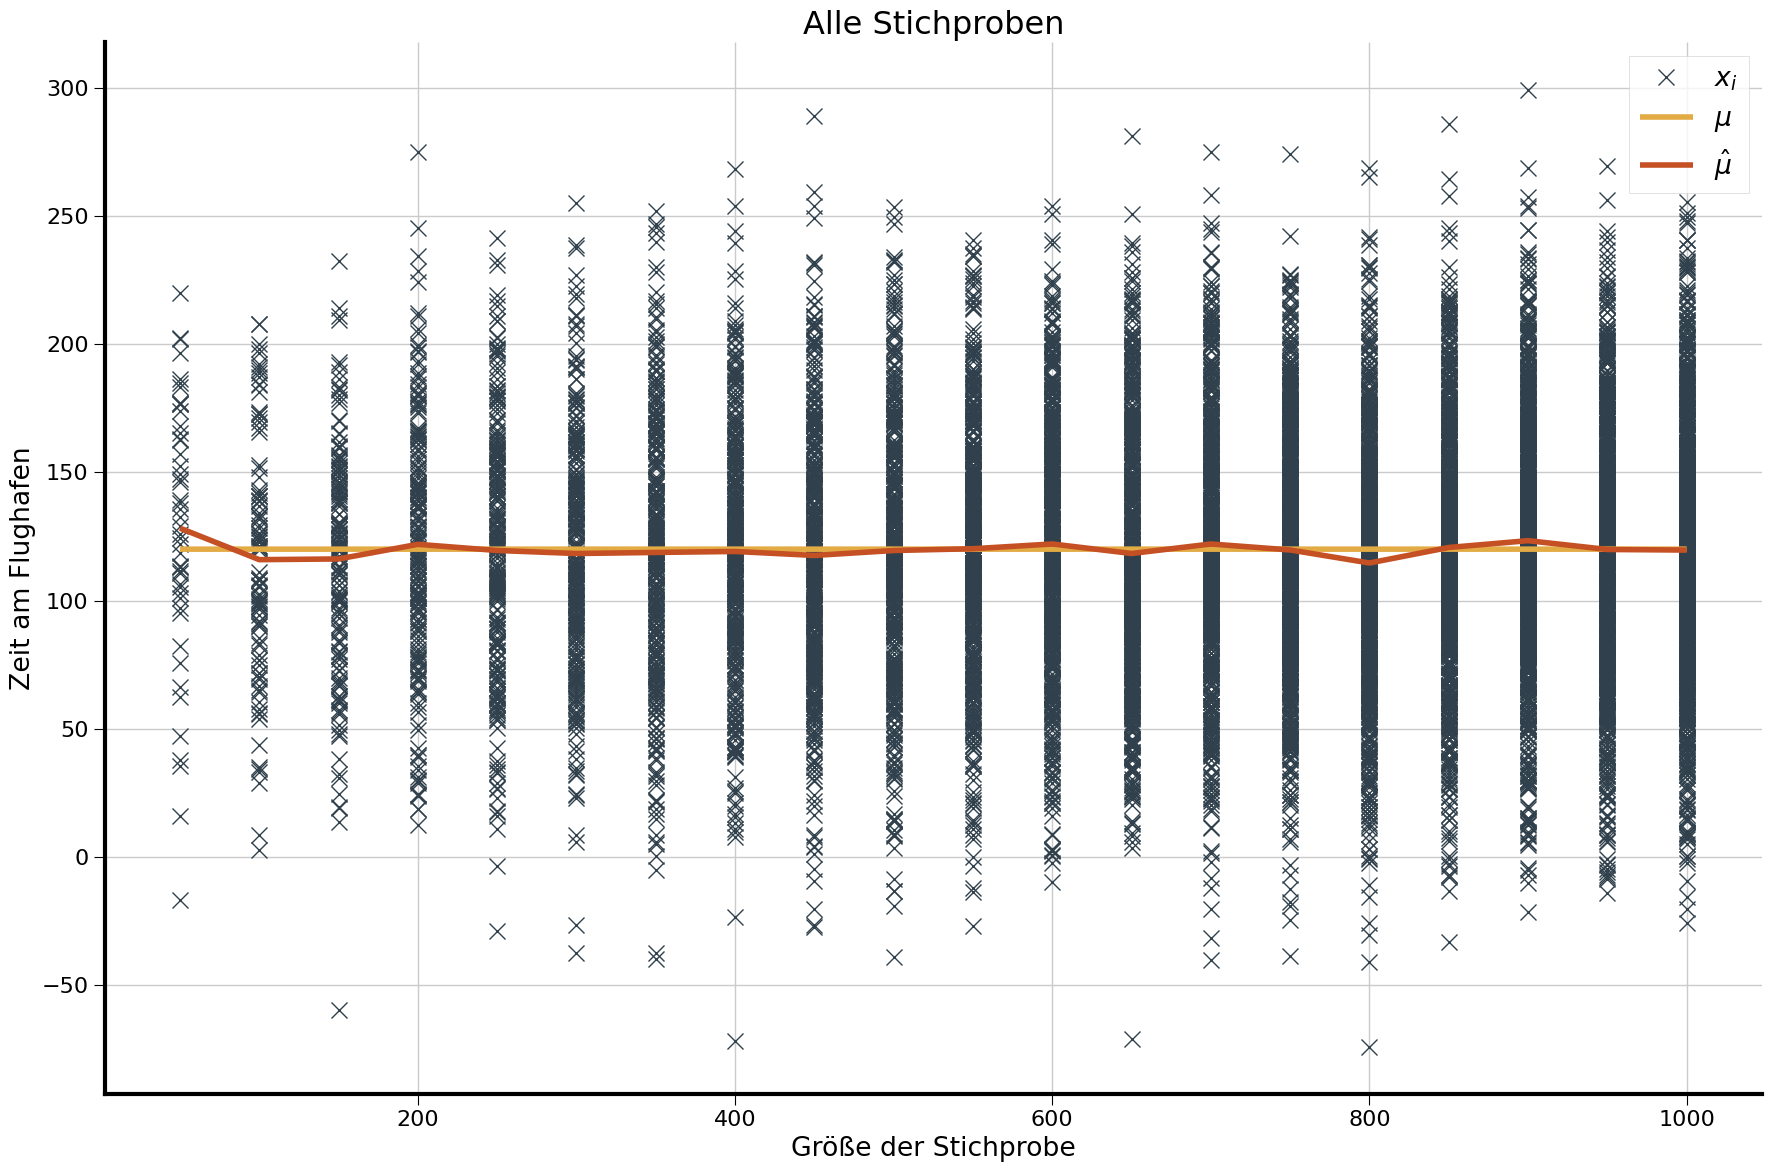

In [71]:
data = [{'x': x, 'y': xi, 'label': '$x_i$', 'format': 'x'},
        {'x': x, 'y': np.ones(len(x))*df['Zeit am Flughafen'].mean(), 'label': '$\mu$','format':'-'},
        {'x': range(50,1050,50), 'y': y, 'label': '$\hat{\mu}$' ,'format':'-'}]
title = {'title':'Alle Stichproben', 'ylabel': 'Zeit am Flughafen', 'xlabel':'Größe der Stichprobe'}
plot_lines(data, plot_size, title)

# Standardabweichung 

* $\sigma$ ist die **Standardabweichung** einer Zufallsvariable $X$. In der Regel unbekannt. 
* $\sigma$ und $\mu$ beschreiben die Verteilung der Daten einer Zufallsvariable.
    * (wenn die Art der Verteilung bekannt ist.)
* Desto größer $\sigma$ desto mehr weichen die einzelnen Werte von $\mu$ ab. 

# Residual Sum of Squares


**<center> $$RSS = \sum_{i=1}^n (y_i-\hat{y}_i)^2$$ </center>**
* $RSS$ ist die Residual Sum of Squares, die Differenz aus Vorhersage und wahrem Wert zum Quadrat
* Ein Residuum ist definiert als die Abweichung vom gewünschten Ergebnis $e_i = y_i - \hat{y}_i $

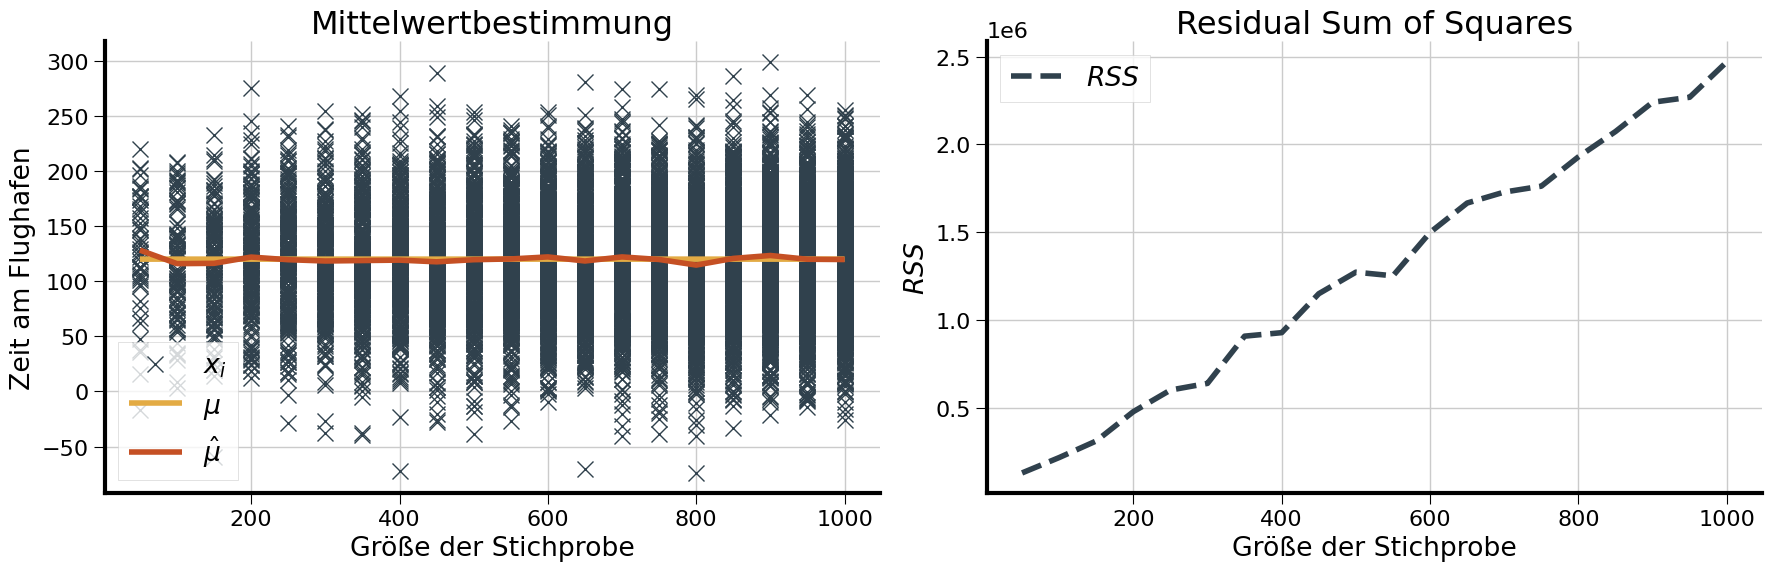

In [72]:
# Plotte alle Messwerte über der Größe der Stichprobe
# Trage den "wahren" Mittelwert ein
# Trage den  Mittelwert pro Stichprobe ein

# Stelle RSS dar

fig, ax = plt.subplots(1, 2, figsize=half_plot_size)

ax[0].plot(x,xi,'x' , label='$x_i$' )
ax[0].plot(x, np.ones(len(x))*df['Zeit am Flughafen'].mean(), label='$\mu$')
ax[0].plot(range(50,1050,50), y, label='$\hat{\mu}$')
ax[0].legend()
ax[0].set_title('Mittelwertbestimmung')
ax[0].set_ylabel('Zeit am Flughafen')
ax[0].set_xlabel('Größe der Stichprobe')

ax[1].plot(range(50,1050,50),rss_i,'--' , label='$RSS$' )
ax[1].legend()

ax[1].set_title('Residual Sum of Squares')
ax[1].set_ylabel('$RSS$')
ax[1].set_xlabel('Größe der Stichprobe')
plt.tight_layout()
plt.show()


# Residual Standard Error

**<center> $$RSE = \sqrt{\frac{RSS}{n-p-1}}$$ </center>**

* $RSE$ ist der Residual Standard Error, er entspricht der Schätzung von $\sigma$ auf den Daten
* Analog zu $\mu$ und $\bar{x}$
* Desto größer die Anzahl der Sample, desto geringer ist der Fehler und desto kleiner ist der Modelleinfluß.

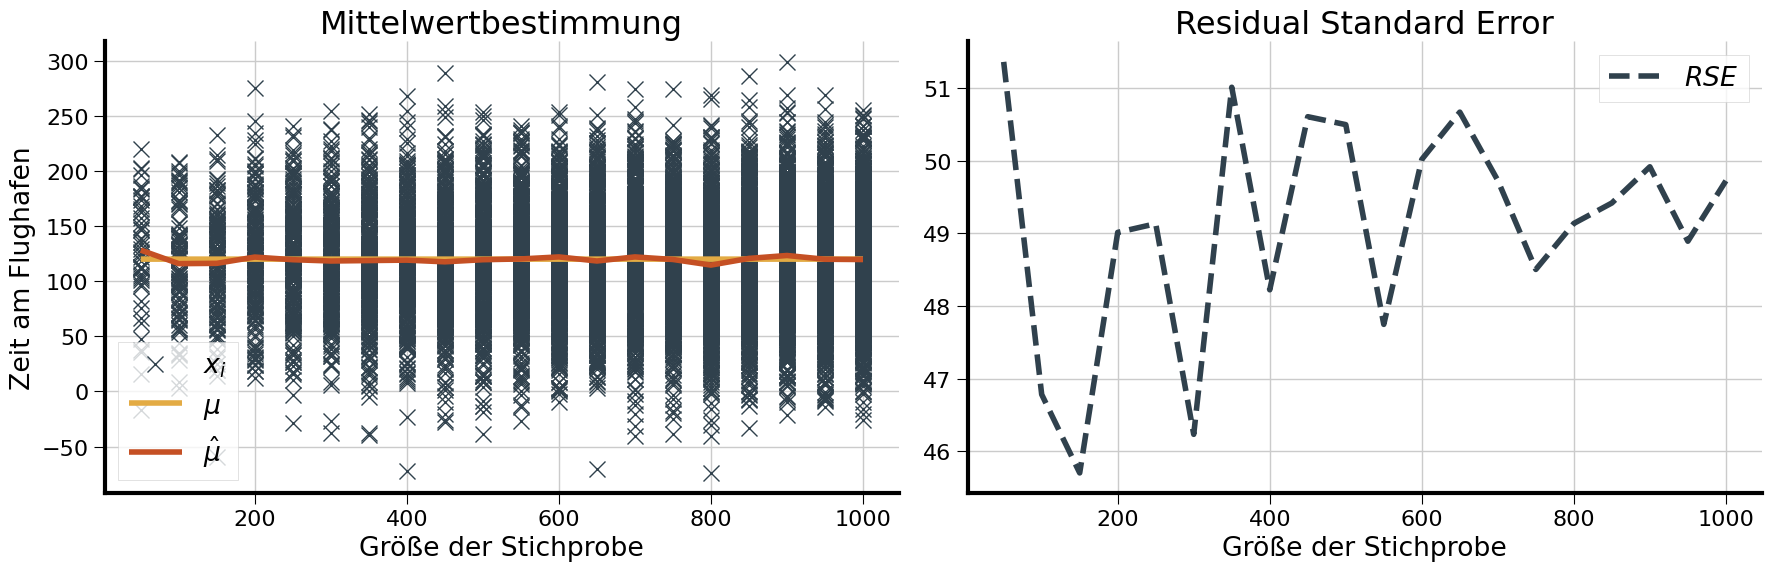

In [73]:
# Plotte alle Messwerte über der Größe der Stichprobe
# Trage den "wahren" Mittelwert ein
# Trage den  Mittelwert pro Stichprobe ein

# Stelle RSE dar

fig, ax = plt.subplots(1, 2, figsize=half_plot_size)

ax[0].plot(x,xi,'x' , label='$x_i$' )
ax[0].plot(x, np.ones(len(x))*df['Zeit am Flughafen'].mean(), label='$\mu$')
ax[0].plot(range(50,1050,50), y, label='$\hat{\mu}$')
ax[0].legend()
ax[0].set_title('Mittelwertbestimmung')
ax[0].set_ylabel('Zeit am Flughafen')
ax[0].set_xlabel('Größe der Stichprobe')

ax[1].plot(range(50,1050,50),rse,'--' , label='$RSE$' )
ax[1].legend()

ax[1].set_title('Residual Standard Error')
ax[1].set_xlabel('Größe der Stichprobe')
plt.tight_layout()
plt.show()


# Standard Error

* $SE$ ist der Standard Error eines Schätzers, also z.B. $\hat{\mu}$.
* Für eine einfache Mittelwertsbestimmung gilt folgende Formel:

**<center> $$SE = \frac{\sigma^2}{n}$$ </center>**



* Mit Hilfe des SE lässt sich ein ungefähres Konfidenzintervall abschätzten. 
* Hier greifen einige Vereinfachungen, die nicht Bestandteil der Vorlesung sind. 
* Mit 95% Wahrscheinlichkeit befindet sich der wahre Wert in diesem Intervall

**<center> $$ \hat{\mu} \pm 2SE(\hat{\mu}) $$</center>**

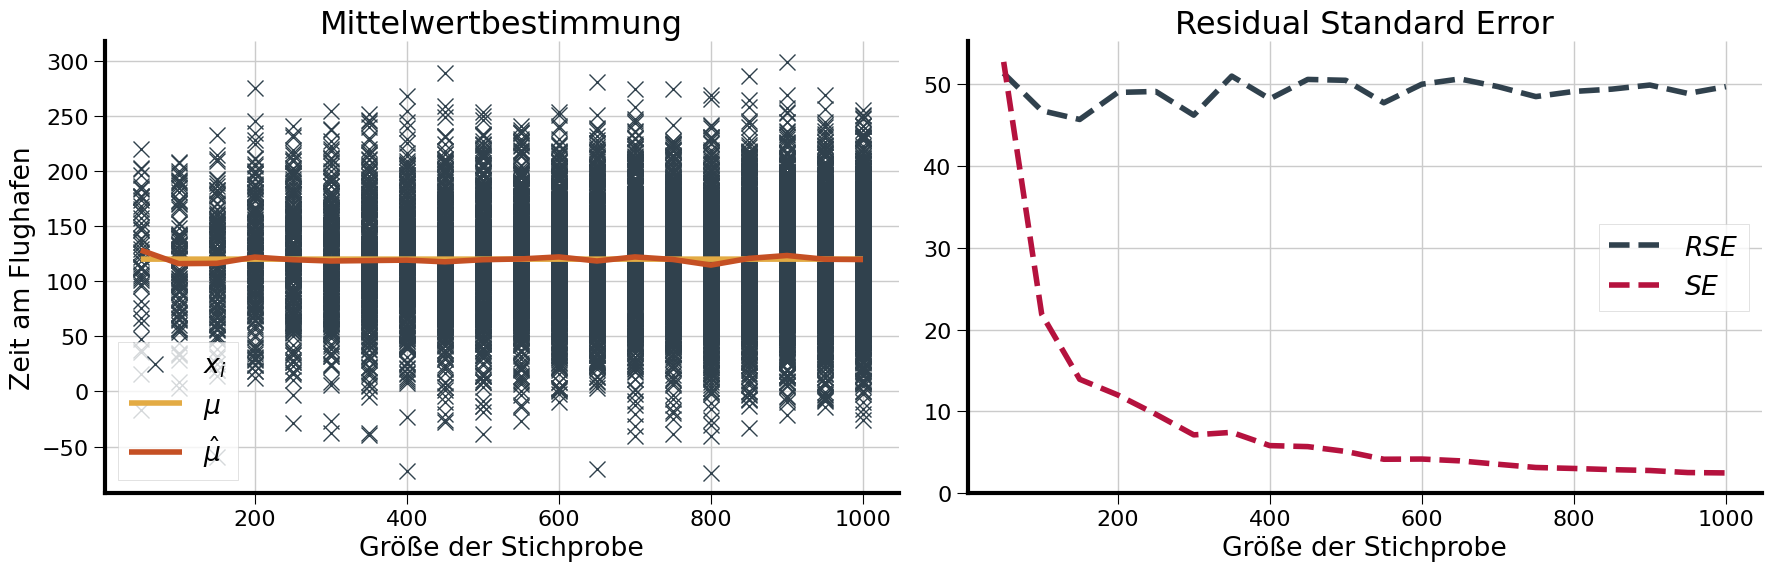

In [74]:
# Plotte alle Messwerte über der Größe der Stichprobe
# Trage den "wahren" Mittelwert ein
# Trage den  Mittelwert pro Stichprobe ein

# Stelle RSE und SE dar


fig, ax = plt.subplots(1, 2, figsize=half_plot_size)

ax[0].plot(x,xi,'x' , label='$x_i$' )
ax[0].plot(x, np.ones(len(x))*df['Zeit am Flughafen'].mean(), label='$\mu$')
ax[0].plot(range(50,1050,50), y, label='$\hat{\mu}$')
ax[0].legend()
ax[0].set_title('Mittelwertbestimmung')
ax[0].set_ylabel('Zeit am Flughafen')
ax[0].set_xlabel('Größe der Stichprobe')

ax[1].plot(range(50,1050,50),rse,'--' , label='$RSE$' )
ax[1].plot(range(50,1050,50),se,'--' , label='$SE$', c=dark_red )
ax[1].legend()

ax[1].set_title('Residual Standard Error')
ax[1].set_xlabel('Größe der Stichprobe')
plt.tight_layout()
plt.show()


# Mittelwert mit SE

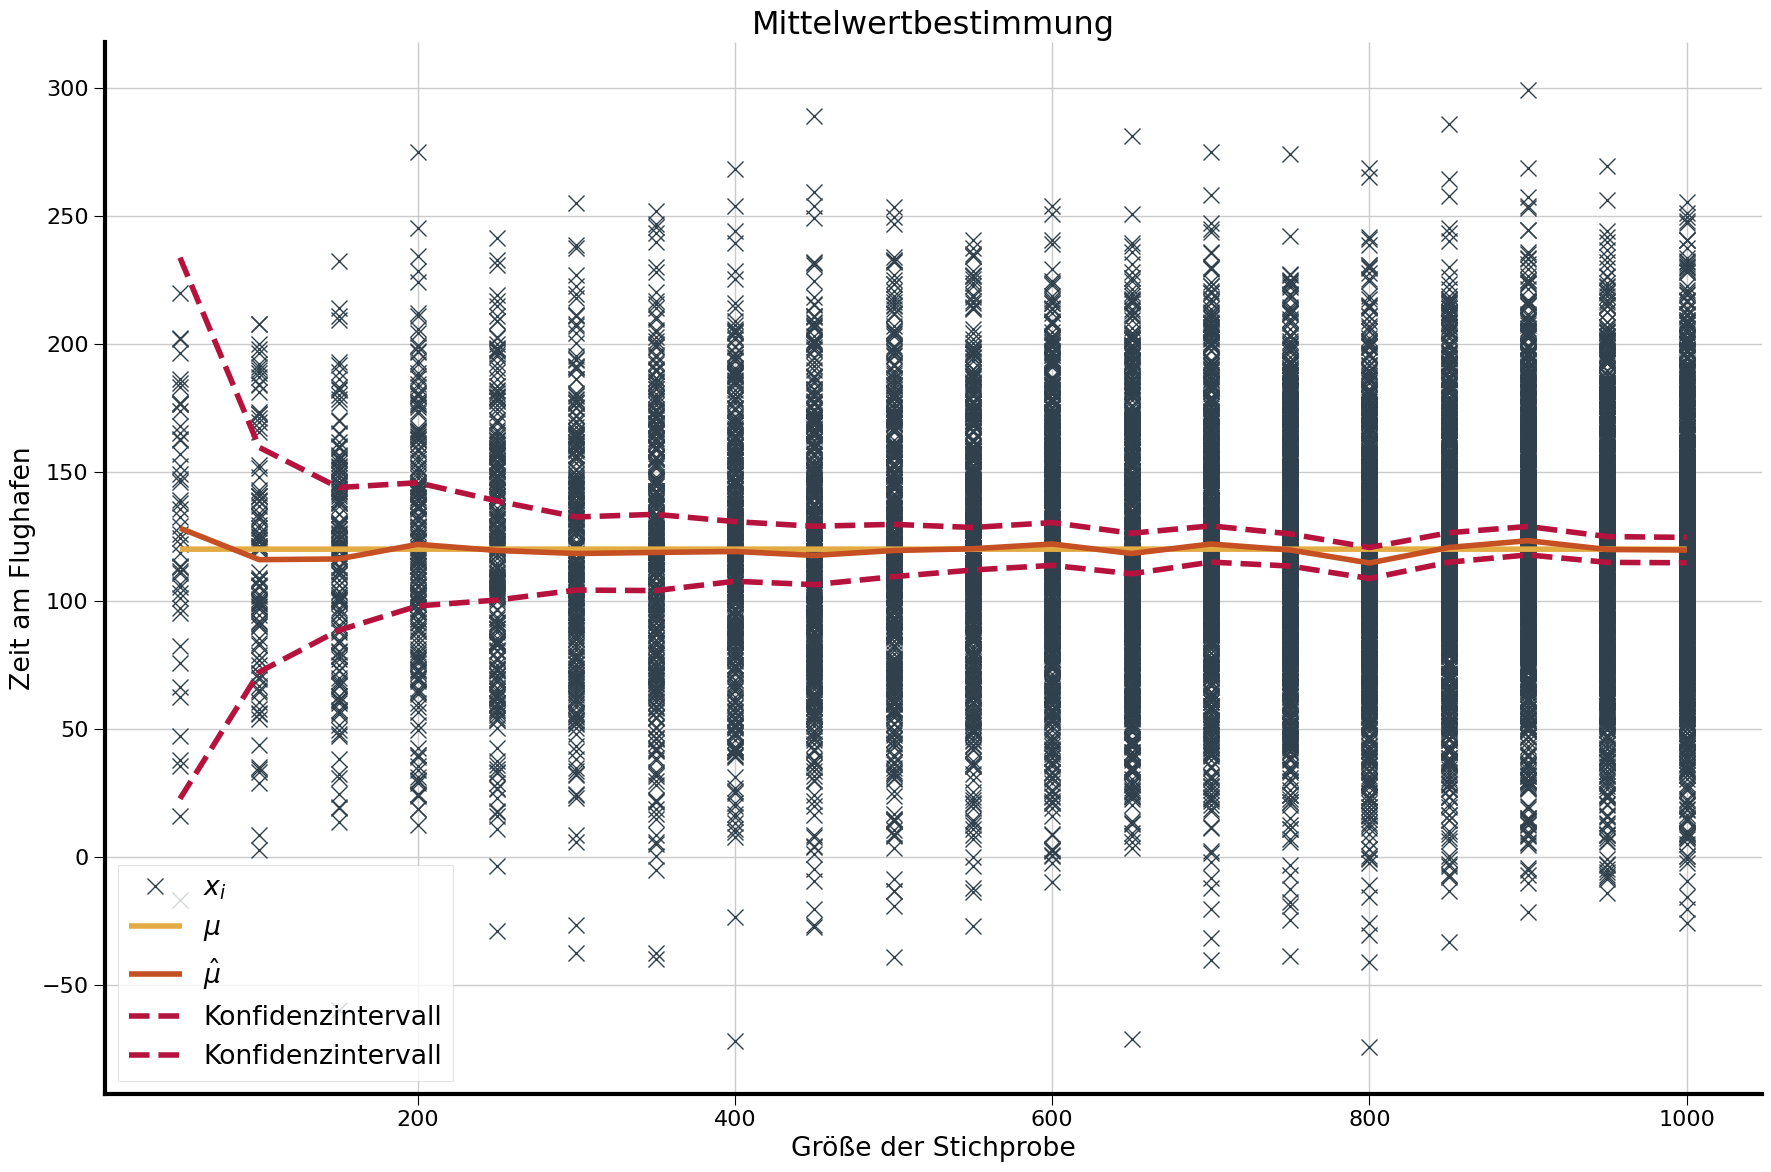

In [75]:
# Plotte alle Messwerte über der Größe der Stichprobe
# Trage den "wahren" Mittelwert ein
# Trage den  Mittelwert pro Stichprobe ein
# Zeichne das Konfidenzintervall ein

fig, ax = plt.subplots(1, 1, figsize=plot_size)

ax.plot(x,xi,'x' , label='$x_i$' )
ax.plot(x, np.ones(len(x))*df['Zeit am Flughafen'].mean(), label='$\mu$')
ax.plot(range(50,1050,50), y, label='$\hat{\mu}$')
ax.plot(range(50,1050,50), [y_i+2*se_i for y_i, se_i in zip(y,se)], '--', label='Konfidenzintervall', c=dark_red)
ax.plot(range(50,1050,50), [y_i-2*se_i for y_i, se_i in zip(y,se)], '--', label='Konfidenzintervall', c=dark_red)

ax.legend()
plt.title('Mittelwertbestimmung')
plt.ylabel('Zeit am Flughafen')
plt.xlabel('Größe der Stichprobe')
plt.tight_layout()
plt.show()


# Normalverteilung oder Gaußverteilung

$$f(x | \mu, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

* Die Fläche unter der Kurve ist gleich 1.
* Die Funktion reicht von plus bis minus unendlich.
* Eignet sich zur Beschreibung vieler natürlicher Phänomene.


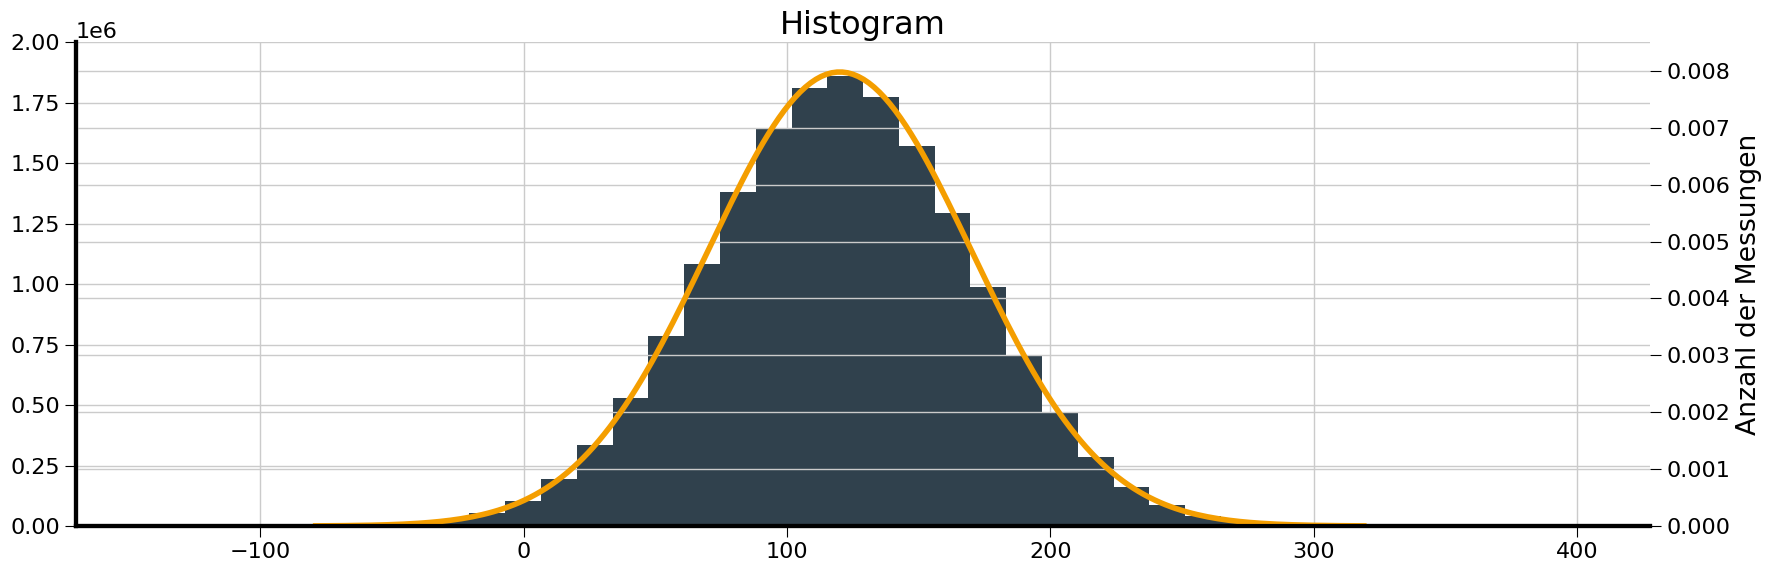

In [76]:
# Plotte das Histogram über die Flugdaten
# Plotte eine passene Normalverteilung

import scipy.stats as stats

mu = 120
sigma = 50
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

plt.hist(df['Zeit am Flughafen'],40)

ax2 = ax.twinx()
ax2.plot(x, stats.norm.pdf(x, mu, sigma), c=orange)

ax2.set_ylim(0,0.0085)
ax.set_ylim(0,2000000)
plt.title('Histogram')
plt.ylabel('Anzahl der Messungen')
plt.xlabel('Zeit am Flughafen')
plt.tight_layout()
plt.show()


# Standardnormalverteilung


<center><img src="img/Standard_deviation.png" width=40% class="stretch"></center>

$$f(x ) =  \frac{1}{\sqrt{2\pi}}e^{\frac{-(x)^2}{2}}$$

* Wenn $\mu = 0$ und $\sigma = 1 $ sind, dann vereinfacht sich unsere Formel enorm.
* Wie Zufallsvariablen in dieser Hinsicht manipuliert werden, lernen Sie noch:

    * $50\%$ aller Messwerte haben eine Abweichung von höchstens 0,675 $\sigma$ 
    * $90\%$ aller Messwerte haben eine Abweichung von höchstens 1,645 $\sigma$
    * $95\%$ aller Messwerte haben eine Abweichung von höchstens 1,960 $\sigma$
    * $99\%$ aller Messwerte haben eine Abweichung von höchstens 2,576 $\sigma$
    
*Bild: Wikipedia*

# Zusammenfassung 

* Wahrscheinlichkeitsrechnung
    * Laplace Experiment
    * Bayes Rule
* Zeit am Flughafen
    * Grundlagen der Statistik
    * Konfidenzintervalle
    * Normalverteilung
